In [1]:
from config_voting_ILSVRC12 import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

inst_per_cls = 30
total_cls = 127
simmat_file = os.path.join(Feat['cache_dir'],'simmat_mthrh047.pickle')
with open(simmat_file, 'rb') as fh:
    mat1, mat2 = pickle.load(fh)
    
print(mat1.shape)
N = mat1.shape[0]

mat = mat1
mat_full = mat + mat.T - np.ones((N,N))
# np.fill_diagonal(mat_full, 0)
W_mat = 1. - mat_full

(3810, 3810)


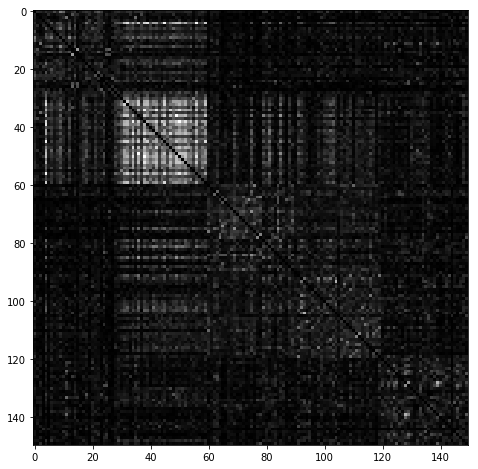

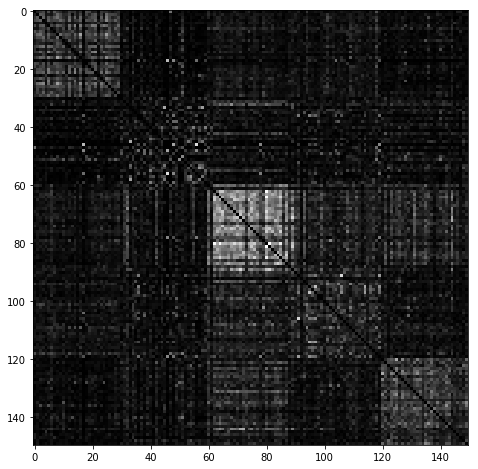

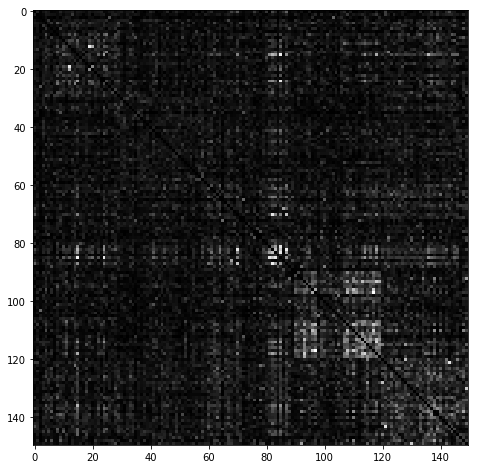

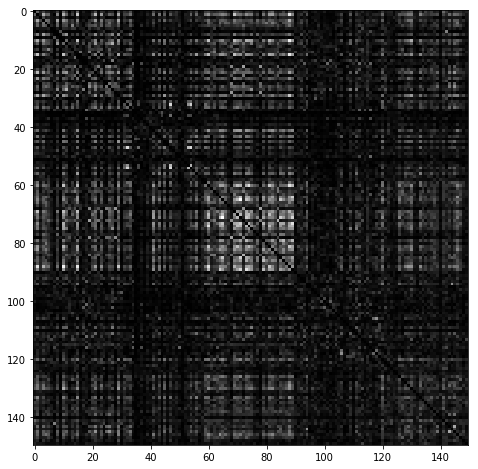

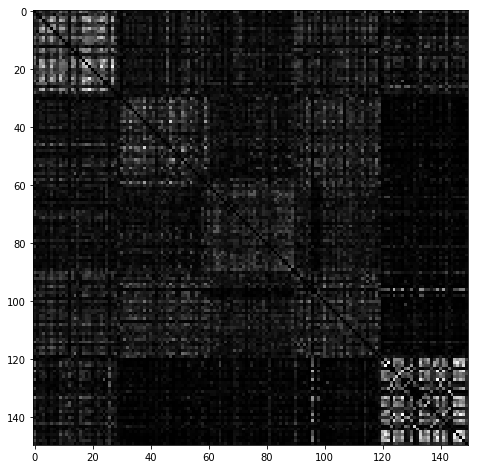

In [2]:
for bb in np.random.permutation(int(total_cls/5))[0:5]:
    plt.imshow(W_mat[bb*inst_per_cls*5:(bb+1)*inst_per_cls*5, bb*inst_per_cls*5:(bb+1)*inst_per_cls*5])
    plt.show()

In [3]:
for rr in np.random.randint(N,size=10):
    ref = rr
    print(ref//inst_per_cls)
    dis_rst = mat_full[rr]
    min_idx = np.argsort(dis_rst)
    tmp_ls = []
    for tt in range(30):
        match = min_idx[tt]
        # print(match//inst_per_cls, end=' ')
        tmp_ls.append(match//inst_per_cls)
        
    # print('')
    print(len(np.unique(tmp_ls)))
    print('.')

17
18
.
59
14
.
123
23
.
97
16
.
1
24
.
35
17
.
105
14
.
64
16
.
40
15
.
21
16
.


In [4]:
from sklearn.cluster import SpectralClustering
K = 4
cls_solver = SpectralClustering(n_clusters=K,affinity='precomputed', random_state=666)
lb = cls_solver.fit_predict(W_mat)
print(np.bincount(lb))

[1847  510  806  647]


In [5]:
lb_adj = []
for rr in range(total_cls):
    lb_ii = np.argmax(np.bincount(lb[rr*inst_per_cls:(rr+1)*inst_per_cls]))
    lb_rr = np.ones(inst_per_cls)*lb_ii
    lb_adj = np.concatenate([lb_adj, lb_rr])
    
lb_adj = lb_adj.astype(int)
print(np.bincount(lb_adj))

[2310  210  690  600]


In [6]:
print(np.bincount(lb_adj)/30)

[ 77.   7.  23.  20.]


In [8]:
lb_cls = []
for rr in range(total_cls):
    lb_ii = np.argmax(np.bincount(lb[rr*inst_per_cls:(rr+1)*inst_per_cls]))
    lb_cls.append(lb_ii)
    
print(lb_cls)

[0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 3, 0, 0, 2, 0, 0, 0, 0, 3, 2, 1, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 3, 0, 3, 2, 3, 3, 0, 3, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 1, 3, 2, 0, 0, 3, 1, 3, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 3, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 1, 0, 3, 2, 0, 2, 0, 0, 0, 0, 3, 2, 2, 0, 3, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0]


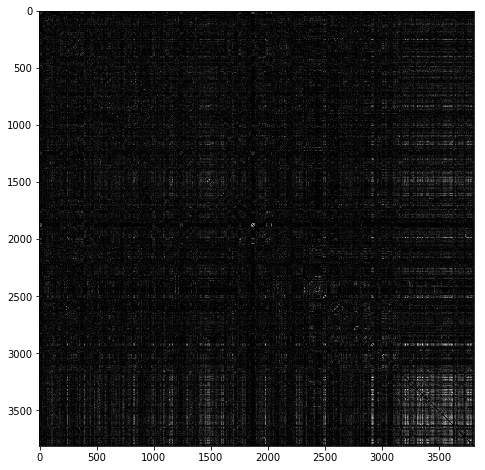

In [19]:
idx_s = np.concatenate([np.where(lb_adj==kk)[0] for kk in range(K)])
plt.imshow(W_mat[np.ix_(idx_s,idx_s)])
plt.show()

In [54]:
K2=2
idx2 = []
W_mat2 = []
lb2 = []
for k in range(K):
    idx2.append(np.where(lb_adj==k)[0])
    W_mat2.append(W_mat[np.ix_(idx2[k],idx2[k])])
    print(np.mean(W_mat2[k]), np.std(W_mat2[k]))
    
    cls_solver = SpectralClustering(n_clusters=K2,affinity='precomputed', random_state=999)
    lb2.append(cls_solver.fit_predict(W_mat2[k]))
    
lb2_adj = []
for kk in range(K2):
    lb2_adj_kk = []
    for rr in range(int(len(lb2[kk])/30)):
        lb_ii = np.argmax(np.bincount(lb2[kk][rr*inst_per_cls:(rr+1)*inst_per_cls]))
        lb_rr = np.ones(inst_per_cls)*lb_ii
        lb2_adj_kk = np.concatenate([lb2_adj_kk, lb_rr])
        
    lb2_adj.append(lb2_adj_kk)
    
print(lb2_adj[0])

lb2_cls = []
for kk in range(K2):
    lb2_cls_kk = []
    for rr in range(int(len(lb2[kk])/30)):
        lb_ii = np.argmax(np.bincount(lb2[kk][rr*inst_per_cls:(rr+1)*inst_per_cls]))
        lb2_cls_kk.append(lb_ii)
        
    lb2_cls.append(lb2_cls_kk)
    
print(lb2_cls)

lb_cls = np.array(lb_cls)
lb2_cls = [np.array(subls) for subls in lb2_cls]

rst_lbs1 = np.ones(len(lb2_cls[0]))*-1
rst_lbs1[np.where(lb2_cls[0]==0)[0]] = 0
rst_lbs1[np.where(lb2_cls[0]==1)[0]] = 1
rst_lbs2 = np.ones(len(lb2_cls[1]))*-1
rst_lbs2[np.where(lb2_cls[1]==0)[0]] = 2
rst_lbs2[np.where(lb2_cls[1]==1)[0]] = 3


rst_lbs = np.ones(len(lb_cls))*-1
rst_lbs[np.where(lb_cls==0)[0]] = rst_lbs1
rst_lbs[np.where(lb_cls==1)[0]] = rst_lbs2
print(rst_lbs)

0.0373597146922 0.0367519636353
0.100205139479 0.0791084166001


In [9]:
import numpy as np
subset_lb=np.array(lb_cls)
np.where(subset_lb==1)

(array([ 26,  66,  72,  83,  89, 100, 115]),)

In [10]:
with open('/export/home/qliu24/dataset/ILSVRC12/list_fg/cls_labels_127.txt','r') as fh:
    content = fh.readlines()
    
cls_lb = [cc.strip().split() for cc in content]
print(len(cls_lb))
print(cls_lb[0])

127
['n02856463', 'board']


In [11]:
for iid in np.where(subset_lb==1)[0]:
    print(cls_lb[iid][1])

bar
geological_formation
heavier-than-air_craft
gymnastic_apparatus
key
pen
lighter-than-air_craft
